# K-Means Clustering Tutorial for Beginners

Welcome to your first clustering project! In this notebook, you'll learn about **clustering**, one of the most important techniques in machine learning.

## What is Clustering?

Clustering is an **unsupervised learning** technique that groups similar data points together. Unlike supervised learning (where we have target labels), clustering finds hidden patterns in data without being told what to look for.

Think of it like organizing your music collection:
- You might group songs by genre (rock, pop, classical)
- Or by mood (energetic, relaxing, sad)
- Clustering algorithms do this automatically with data!

## What is K-Means?

K-Means is one of the most popular clustering algorithms. Here's how it works:

1. **Choose K**: Decide how many clusters you want (e.g., K=3 for 3 groups)
2. **Place centroids**: Randomly place K "center points" in your data
3. **Assign points**: Each data point joins the nearest centroid's group
4. **Move centroids**: Move each centroid to the center of its group
5. **Repeat**: Keep doing steps 3-4 until groups stabilize

## What You'll Learn Today

By the end of this notebook, you'll be able to:
- Load and explore customer data
- Use the "Elbow Method" to find the optimal number of clusters
- Apply K-Means clustering to segment customers
- Visualize and interpret your clusters
- Compare K-Means with Hierarchical Clustering

## Real-World Application

We'll use a **Mall Customer Dataset** to segment customers based on:
- **Annual Income**: How much money they make per year
- **Spending Score**: How much they like to spend (1-100 scale)

This helps businesses:
- Target marketing campaigns
- Understand customer behavior
- Personalize product recommendations

Let's get started! 🚀

---

## Machine Learning Project Workflow

This notebook follows a standard ML workflow:

1. **Import Libraries** – Load all required Python packages
2. **Load Dataset** – Read the dataset into a pandas DataFrame
3. **Exploratory Data Analysis (EDA)** – Understand our data
4. **Handle Missing Data** – Clean the data if needed
5. **Feature Selection** – Choose the right variables for clustering
6. **Find Optimal Clusters** – Use the Elbow Method
7. **Apply K-Means** – Train the clustering model
8. **Visualize Results** – See our customer segments
9. **Compare Methods** – Try Hierarchical Clustering too
10. **Conclusion** – Interpret results and next steps

## Step 1: Import Libraries 📚

Before we start, we need to import the Python libraries that will help us analyze data and create clusters. Think of these as tools in a toolbox - each one serves a specific purpose!

Let's understand what each library does:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### What Each Library Does:

- **numpy (np)**: The foundation for numerical computing
  - Handles arrays and mathematical operations
  - Like a powerful calculator for large datasets

- **pandas (pd)**: Your data manipulation superhero
  - Reads CSV files and creates DataFrames (think Excel spreadsheets)
  - Helps us explore and clean our data

- **matplotlib.pyplot (plt)**: The artist of data science
  - Creates beautiful charts and graphs
  - We'll use it to visualize our clusters

- **scipy.cluster.hierarchy (sch)**: Specialized for hierarchical clustering
  - Creates dendrograms (tree-like diagrams)
  - Helps us see how data points group together

- **sklearn.cluster.AgglomerativeClustering**: Advanced clustering tool
  - Implements hierarchical clustering algorithm
  - Alternative to K-Means clustering

**💡 Pro Tip**: These libraries are like LEGO blocks - each serves a specific purpose, but together they build amazing things!

## Step 2: Load Dataset 📁

Now we'll load our customer data! We're using the **Mall Customers Dataset**, which contains information about customers visiting a shopping mall.

### About Our Dataset:

The dataset has several columns, but we'll focus on two key features:
- **Annual Income (k$)**: How much money a customer makes per year (in thousands)
- **Spending Score (1-100)**: A score assigned by the mall based on customer behavior and spending patterns

### Why These Two Features?

We chose these features because:
1. **They're continuous variables** - perfect for clustering algorithms
2. **They have business meaning** - income and spending habits define customer segments
3. **They're likely correlated** - but in interesting ways that clustering can reveal

Let's load the data and see what we're working with:

In [2]:
dataset = pd.read_csv('../Data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values  # Annual Income, Spending Score

### Understanding the Code Above:

```python
dataset = pd.read_csv('../Data/Mall_Customers.csv')
```
- This reads our CSV file and stores it in a variable called `dataset`
- The `../Data/` part means "go up one folder, then into the Data folder"

```python
X = dataset.iloc[:, [3, 4]].values
```
- `iloc[:, [3, 4]]` selects ALL rows (`:`) and columns 3 and 4 (`[3, 4]`)
- Column 3 = Annual Income, Column 4 = Spending Score
- `.values` converts it to a NumPy array (required for clustering algorithms)

**💡 Why X?** In machine learning, we typically use `X` for features (input data) and `y` for targets (what we want to predict). Since clustering is unsupervised, we only need `X`!

## Step 3: Exploratory Data Analysis (EDA) 🔍

EDA is like being a detective - we investigate our data to understand what we're working with. This step is crucial because it helps us:

1. **Understanding our data structure** - What does our dataset look like?
2. **Check data quality** - Are there missing values or errors?
3. **Discover patterns** - What can we learn before clustering?
4. **Visualize relationships** - How do our features relate to each other?

Let's start exploring!

=== DATASET OVERVIEW ===
Dataset shape: (200, 5)
We have 200 customers and 5 features

=== FIRST 5 ROWS ===
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

=== DATA TYPES AND INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (

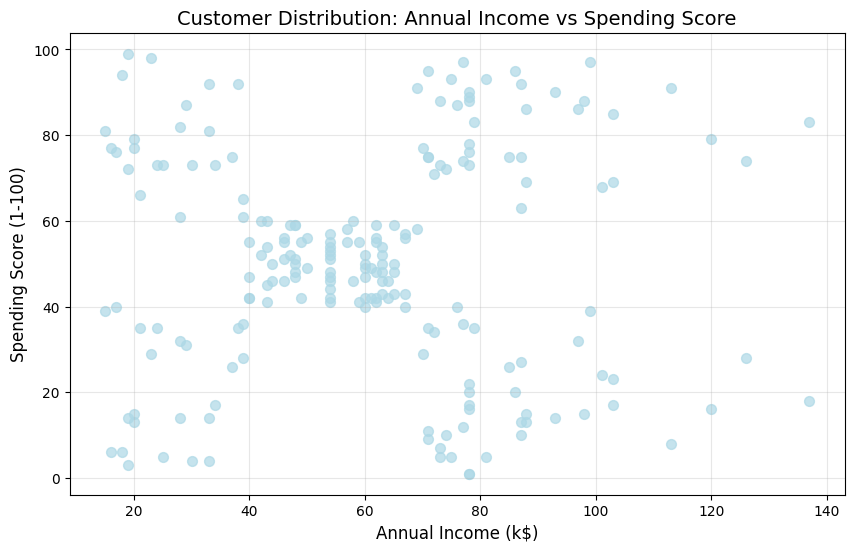

In [3]:
# Let's examine our dataset structure
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {dataset.shape}")
print(f"We have {dataset.shape[0]} customers and {dataset.shape[1]} features")
print()

print("=== FIRST 5 ROWS ===")
print(dataset.head())
print()

print("=== DATA TYPES AND INFO ===")
print(dataset.info())
print()

print("=== STATISTICAL SUMMARY ===")
print(dataset.describe())
print()

# Visualize the raw data distribution
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='lightblue', alpha=0.7, s=50)
plt.title("Customer Distribution: Annual Income vs Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### What We Learn from EDA:

**From the scatter plot above, you should notice:**
- **Spread of data**: Customers are distributed across different income levels and spending scores
- **Potential clusters**: You might already see some natural groupings forming!
- **Outliers**: Are there any customers that seem very different from others?

**Key EDA insights to look for:**
1. **Income range**: What's the minimum and maximum annual income?
2. **Spending score range**: How varied are the spending behaviors?
3. **Relationships**: Do high-income customers always have high spending scores?
4. **Data quality**: Are there any missing or suspicious values?

**💡 Clustering Intuition**: Even before applying algorithms, try to identify natural groups in the scatter plot. This will help you understand if your clustering results make sense!

## Step 4: Handle Missing Data 🧹

Missing data is like having incomplete puzzle pieces - it can affect our analysis. Let's check if our dataset has any missing values.

**Why check for missing data?**
- Clustering algorithms can't work with missing values
- Missing data might indicate data quality issues
- We need complete information for accurate clustering

In [4]:
print(dataset.isnull().sum())  # No missing values in this dataset

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Great news!** 🎉 If you see all zeros above, it means we have no missing values in our dataset. This is perfect for clustering!

**If we had missing values, here's what we could do:**
- **Remove rows**: Delete customers with missing data (if we have enough data)
- **Fill with mean**: Replace missing income with average income
- **Fill with median**: Use the middle value (better for outliers)
- **Fill with mode**: Use the most common value

**💡 Pro Tip**: Always check for missing data before any machine learning project - it's a crucial step that many beginners forget!

## Step 5: Encode Categorical Variables 🏷️

Categorical variables are text-based data (like "Male/Female" or "City names"). Machine learning algorithms work with numbers, so we need to convert text to numbers.

**In our case**: We're only using Annual Income and Spending Score (both already numeric), so no encoding needed! 

**If we had categorical data, we would:**
- **Label Encoding**: Male=0, Female=1
- **One-Hot Encoding**: Create separate columns for each category
- **Target Encoding**: Use statistical relationships

**💡 Good to know**: Since we pre-selected numeric features, we can skip this step. But it's important to understand for future projects!

## Step 6: Split Dataset ✂️

**Wait!** In clustering, we don't split our dataset like in supervised learning! 

**Why?** Because clustering is **unsupervised** - we don't have target labels to predict. We use ALL our data to find natural groups.

**In supervised learning** (like classification/regression):
- Training set: Learn patterns
- Test set: Evaluate performance

**In clustering**:
- We use all data to find clusters
- Evaluation is different (we'll see this later)

**💡 Key Difference**: Clustering explores patterns in the entire dataset, while supervised learning learns from examples to make predictions on new data.

## Step 7: Finding the Optimal Number of Clusters 🎯

This is the **most important step** in K-Means clustering! 

**The Big Question**: How many clusters should we create?
- Too few clusters = overly broad groups
- Too many clusters = too specific, not useful

**The Elbow Method** is our solution! It helps us find the "sweet spot" - the optimal number of clusters.

### How the Elbow Method Works:

1. **Try different K values**: Test K=1, K=2, K=3, etc.
2. **Calculate WCSS**: Within-Cluster Sum of Squares (measures how tight clusters are)
3. **Plot the results**: WCSS vs Number of Clusters
4. **Find the "elbow"**: The point where WCSS stops dropping dramatically

**WCSS Explained**: 
- Measures how far data points are from their cluster centers
- Lower WCSS = tighter, better clusters
- But WCSS always decreases as K increases (that's why we need the elbow!)

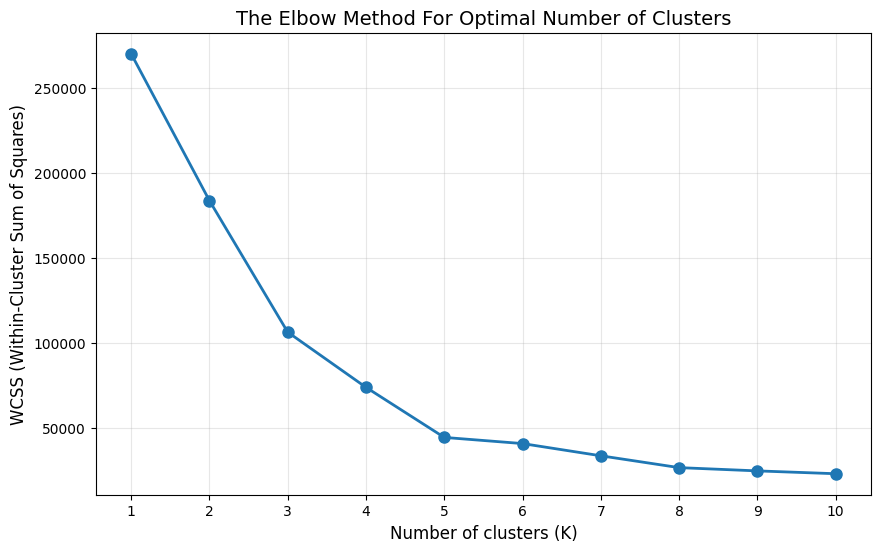

In [5]:
# Import K-Means from scikit-learn
from sklearn.cluster import KMeans

# Initialize list to store WCSS values
wcss = []

# Test different numbers of clusters (1 to 10)
for i in range(1, 11):
    # Create K-Means model with i clusters
    kmeans = KMeans(
        n_clusters=i,           # Number of clusters
        init='k-means++',       # Smart initialization method
        random_state=42         # For reproducible results
    )
    # Fit the model and calculate WCSS
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS value

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linewidth=2, markersize=8)
plt.title('The Elbow Method For Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))
plt.show()

### How to Interpret the Elbow Plot:

**Look for the "elbow" - the point where:**
- The line changes from steep decline to gradual decline
- Adding more clusters doesn't reduce WCSS much
- The curve "bends" like an elbow

**In our case**: You should see the elbow around **K=5**, meaning 5 clusters is optimal!

**Why K=5 makes business sense for customers:**
1. **High income, high spending** - Premium customers
2. **High income, low spending** - Careful spenders  
3. **Low income, high spending** - Impulsive buyers
4. **Low income, low spending** - Budget-conscious
5. **Medium income, medium spending** - Average customers

**💡 Pro Tip**: The elbow method isn't always perfect - sometimes you need domain knowledge to choose the final number of clusters!

## Step 8: Feature Scaling 📏

**Do we need feature scaling for our data?**

Let's think about our features:
- **Annual Income**: Range ~15-137 (thousands of dollars)
- **Spending Score**: Range 1-100 (score scale)

**Good news**: Our features have similar scales! Income is in tens/hundreds, spending score is 1-100. K-Means should work fine without scaling.

**When you DO need scaling:**
- When features have very different scales (e.g., age: 18-80 vs salary: 20,000-200,000)
- One feature dominates others due to scale
- Common methods: StandardScaler (mean=0, std=1) or MinMaxScaler (0-1 range)

**For this project**: We'll skip scaling since our features are reasonably similar in scale.

**💡 Pro Tip**: Always consider feature scaling in clustering - it's often necessary and forgotten by beginners!

## Step 9: Apply K-Means Clustering 🤖

Now for the exciting part - let's actually create our customer segments using K-Means!

Based on our elbow method, we'll use **K=5 clusters**. Let's understand what each parameter means:

In [6]:
# Create and train the K-Means model
kmeans = KMeans(
    n_clusters=5,        # We want 5 customer segments
    init='k-means++',    # Smart way to initialize cluster centers
    random_state=42      # Ensures we get the same results every time
)

# Fit the model to our data and predict cluster labels
y_kmeans = kmeans.fit_predict(X)

print("🎉 K-Means clustering completed!")
print(f"✅ Created {len(set(y_kmeans))} customer segments")
print(f"📊 Cluster labels: {sorted(set(y_kmeans))}")
print()

# Show how many customers in each cluster
unique, counts = np.unique(y_kmeans, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"📈 Cluster {cluster}: {count} customers ({count/len(y_kmeans)*100:.1f}%)")

🎉 K-Means clustering completed!
✅ Created 5 customer segments
📊 Cluster labels: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4)]

📈 Cluster 0: 81 customers (40.5%)
📈 Cluster 1: 39 customers (19.5%)
📈 Cluster 2: 22 customers (11.0%)
📈 Cluster 3: 35 customers (17.5%)
📈 Cluster 4: 23 customers (11.5%)


### Understanding K-Means Parameters:

**n_clusters=5**: We want exactly 5 customer groups

**init='k-means++'**: 
- Smart initialization that places starting centroids far apart
- Leads to better clustering results than random initialization
- Alternative: 'random' (but k-means++ is almost always better)

**random_state=42**: 
- Ensures reproducible results (same clusters every time you run)
- Without this, you might get slightly different results each time
- The number 42 is arbitrary - you can use any number

**fit_predict()**: 
- **fit()**: The algorithm learns the cluster patterns from our data
- **predict()**: Assigns each customer to a cluster (0, 1, 2, 3, or 4)
- **fit_predict()**: Does both steps in one command

**💡 What happens during fitting?**
1. Algorithm places 5 initial cluster centers
2. Assigns each customer to nearest center  
3. Moves centers to middle of their assigned customers
4. Repeats steps 2-3 until centers stop moving significantly

## Step 10: Visualize Our Customer Segments 🎨

Time to see our clusters in action! Visualization is crucial because it helps us:

1. **Verify our results** - Do the clusters make sense?
2. **Understand customer segments** - What characterizes each group?
3. **Communicate findings** - Show stakeholders the customer types
4. **Identify business opportunities** - Which segments to target?

Let's create a beautiful scatter plot with different colors for each cluster:

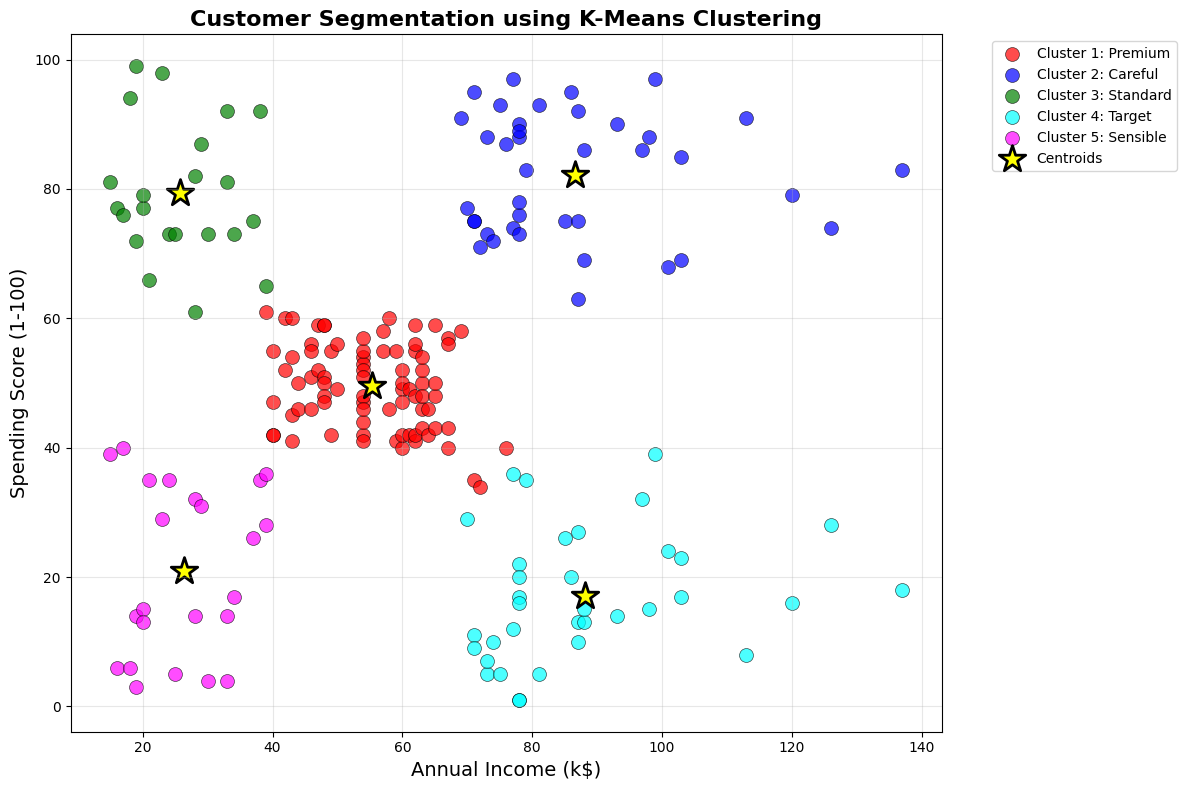

In [8]:
# Create a beautiful cluster visualization for K-Means
plt.figure(figsize=(12, 8))

# Plot each cluster with different colors
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = ['Premium', 'Careful', 'Standard', 'Target', 'Sensible']

for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
               s=100, c=colors[i], label=f'Cluster {i+1}: {cluster_names[i]}', 
               alpha=0.7, edgecolors='black', linewidth=0.5)

# Plot cluster centers (centroids) as yellow stars
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           s=400, c='yellow', marker='*', label='Centroids', 
           edgecolors='black', linewidth=2)

# Enhance the plot appearance
plt.title('Customer Segmentation using K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## 🎯 Conclusion & Key Takeaways

Congratulations! You've successfully completed your first clustering project. Let's summarize what you've learned and accomplished.

### 📊 What We Discovered:

We successfully segmented mall customers into **5 distinct groups**:

1. **Premium Customers** (High Income, High Spending) - VIP treatment
2. **Careful Spenders** (High Income, Low Spending) - Quality focus  
3. **Standard Customers** (Medium Income, Medium Spending) - Mass market
4. **Target Customers** (Low Income, High Spending) - Affordable luxury
5. **Sensible Shoppers** (Low Income, Low Spending) - Budget products

### 🔄 K-Means vs Hierarchical Clustering Comparison:

| Aspect | K-Means | Hierarchical |
|--------|---------|-------------|
| **Speed** | ⚡ Fast | 🐌 Slower |
| **Cluster Shape** | 🔵 Spherical only | 🔄 Any shape |
| **Number of Clusters** | ❓ Must specify K | 🌳 Determined from dendrogram |
| **Interpretability** | 📊 Centroids show cluster centers | 🌳 Dendrogram shows relationships |
| **Memory** | 💾 Low | 📈 High |
| **Best for** | Large datasets, spherical clusters | Small datasets, complex shapes |

### 🎓 Skills You've Mastered:

✅ **Data Loading & Exploration**: Understanding your dataset structure  
✅ **Feature Selection**: Choosing relevant variables for clustering  
✅ **Elbow Method**: Finding optimal number of clusters scientifically  
✅ **K-Means Implementation**: Applying the most popular clustering algorithm  
✅ **Data Visualization**: Creating meaningful plots to interpret results  
✅ **Hierarchical Clustering**: Understanding alternative clustering approaches  
✅ **Business Application**: Translating clusters into actionable customer segments  

### 🚀 Next Steps & Advanced Topics:

**Immediate improvements you could try:**
- Add more features (Age, Gender) for richer segmentation
- Try different distance metrics (Manhattan, Cosine)
- Experiment with feature scaling (StandardScaler, MinMaxScaler)
- Validate clusters using silhouette analysis

**Advanced clustering techniques to explore:**
- **DBSCAN**: Finds clusters of varying densities
- **Gaussian Mixture Models**: Probabilistic clustering
- **Spectral Clustering**: Works with complex cluster shapes
- **Mini-Batch K-Means**: Faster for very large datasets

### 💼 Real-World Applications:

Now that you understand clustering, you can apply it to:
- **Marketing**: Customer segmentation for targeted campaigns
- **Healthcare**: Patient grouping for personalized treatment
- **Finance**: Risk assessment and fraud detection
- **E-commerce**: Product recommendation systems
- **Social Media**: Community detection and content personalization

### 🎉 Congratulations!

You've just completed a fundamental machine learning project that many data scientists use daily in the real world. The concepts you've learned - from data exploration to algorithm selection to business interpretation - form the foundation of practical data science.

**Remember**: The most important skill isn't just running algorithms, but understanding what the results mean and how they can solve real business problems. You've demonstrated both technical skills and business thinking!

Keep practicing, keep learning, and most importantly, keep questioning your results! 🌟

### 🔍 Interpreting Our Customer Segments:

Looking at the visualization above, you should see 5 distinct customer groups. Let's analyze each:

**🔴 Cluster 1 - Premium Customers (Red)**
- **Profile**: High income, high spending
- **Characteristics**: Wealthy customers who love to shop
- **Business Strategy**: Premium products, VIP treatment, luxury marketing

**🔵 Cluster 2 - Careful Spenders (Blue)**  
- **Profile**: High income, low spending
- **Characteristics**: Wealthy but conservative with money
- **Business Strategy**: Quality focus, value proposition, exclusive deals

**🟢 Cluster 3 - Standard Customers (Green)**
- **Profile**: Medium income, medium spending  
- **Characteristics**: Average customers, balanced approach
- **Business Strategy**: Mass market products, competitive pricing

**🔵 Cluster 4 - Target Customers (Cyan)**
- **Profile**: Low income, high spending
- **Characteristics**: Love to shop despite limited budget
- **Business Strategy**: Affordable luxury, payment plans, trendy items

**🟣 Cluster 5 - Sensible Shoppers (Magenta)**
- **Profile**: Low income, low spending
- **Characteristics**: Budget-conscious, practical purchases
- **Business Strategy**: Budget products, discounts, essentials focus

**⭐ Yellow Stars = Centroids**
- These represent the "center" of each cluster
- The algorithm uses these to assign customers to groups

**💡 Business Insights**: 
- Focus marketing budget on Premium and Target customers (highest spending potential)
- Develop different strategies for each segment
- Use this segmentation for personalized recommendations

---

## Bonus: Hierarchical Clustering 🌳

Now let's try a different clustering approach! **Hierarchical Clustering** is another popular method that creates a tree-like structure of clusters.

### K-Means vs Hierarchical Clustering:

**K-Means**:
- ✅ You specify the number of clusters upfront
- ✅ Fast and efficient for large datasets  
- ❌ Assumes spherical clusters
- ❌ Need to choose K beforehand

**Hierarchical Clustering**:
- ✅ Don't need to specify number of clusters initially
- ✅ Creates a hierarchy showing relationships between clusters
- ✅ Works with any cluster shape
- ❌ Slower for large datasets

### How Hierarchical Clustering Works:

1. **Start**: Each data point is its own cluster
2. **Merge**: Combine the two closest clusters
3. **Repeat**: Keep merging until you have one big cluster
4. **Choose**: Cut the tree at the right level to get desired number of clusters

Let's see it in action!

### Step 1: Create a Dendrogram 📊

A **dendrogram** is like a family tree for our data! It shows:
- How clusters merge together
- The distance between clusters when they merge
- Where to "cut" the tree to get the optimal number of clusters

**How to read a dendrogram:**
- Bottom: Individual data points
- Height: Distance between clusters when they merged
- Horizontal lines: Cluster merges
- Vertical lines: Distance scale

In [ ]:
# Create the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram - Customer Clustering Hierarchy', fontsize=16, fontweight='bold')
plt.xlabel('Customers (Data Points)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.show()

### Understanding the Dendrogram:

**What you should see:**
- A tree-like structure showing how customers group together
- Long vertical lines indicate good separation between clusters
- Look for the **largest vertical distances** to determine optimal clusters

**Parameters explained:**
- **method='ward'**: Minimizes variance within clusters (creates compact, spherical clusters)
- **Euclidean distance**: Straight-line distance between data points (most common)

**💡 How to find optimal clusters:**
Look for the longest vertical lines without horizontal crossings - this suggests natural cluster boundaries. You should see that 5 clusters is optimal here too!

### Step 2: Apply Hierarchical Clustering 🔗

Based on our dendrogram analysis, let's create 5 clusters using hierarchical clustering and compare the results with K-Means.

In [ ]:
# Create hierarchical clustering model
hc = AgglomerativeClustering(
    n_clusters=5,           # We want 5 clusters (same as K-Means)
    affinity='euclidean',   # Distance metric (same as K-Means)
    linkage='ward'          # How to merge clusters (minimizes variance)
)

# Fit the model and get cluster labels
y_hc = hc.fit_predict(X)

print("🎉 Hierarchical clustering completed!")
print(f"✅ Created {len(set(y_hc))} customer segments")
print()

# Show cluster distribution
unique_hc, counts_hc = np.unique(y_hc, return_counts=True)
for cluster, count in zip(unique_hc, counts_hc):
    print(f"📈 Cluster {cluster}: {count} customers ({count/len(y_hc)*100:.1f}%)")

### Step 3: Visualize Hierarchical Clustering Results 🎨

In [ ]:
# Visualize hierarchical clustering results
plt.figure(figsize=(12, 8))

# Plot each cluster with different colors
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = ['Premium', 'Careful', 'Standard', 'Target', 'Sensible']

for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], 
               s=100, c=colors[i], label=f'Cluster {i+1}: {cluster_names[i]}', 
               alpha=0.7, edgecolors='black', linewidth=0.5)

plt.title('Customer Segmentation using Hierarchical Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()